In [1]:
import pandas as pd

# baca file dataset
df = pd.read_csv("dataset.csv")   # sesuaikan path jika file ada di folder lain

print("Ukuran dataset:", df.shape)
print("Nama kolom:", df.columns.tolist())
df.head()


Ukuran dataset: (60, 2)
Nama kolom: ['Hours', 'Scores']


,Hours,Scores
0,1.1,41
1,1.2,40
2,1.4,38
3,1.5,39
4,1.6,36


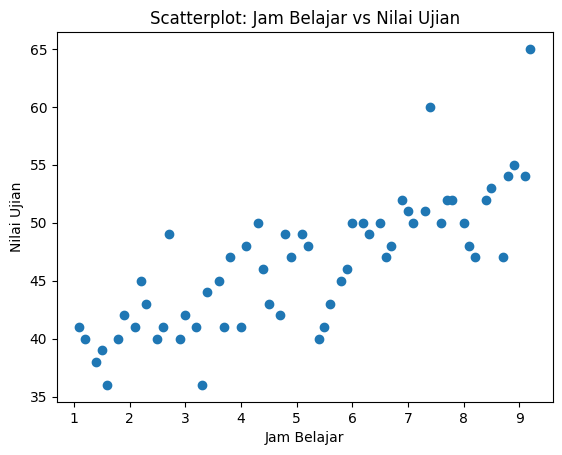

           Hours     Scores
count  60.000000  60.000000
mean    5.150000  46.433333
std     2.402365   5.699737
min     1.100000  36.000000
25%     3.150000  41.000000
50%     5.150000  47.000000
75%     7.150000  50.000000
max     9.200000  65.000000


In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Jam Belajar")
plt.ylabel("Nilai Ujian")
plt.title("Scatterplot: Jam Belajar vs Nilai Ujian")
plt.show()

print(df.describe())


In [4]:
print("Missing values:\n", df.isna().sum())
print("Duplicates:", df.duplicated().sum())

# Hapus NA jika ada
df = df.dropna()

# Filter jam belajar agar masuk akal (0–24 jam)
df = df[(df['Hours'] >= 0) & (df['Hours'] <= 24)]


Missing values:
 Hours     0
Scores    0
dtype: int64
Duplicates: 0


In [5]:
from sklearn.model_selection import train_test_split

X = df[['Hours']]
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (48, 1)
Data uji: (12, 1)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_[0])


Intercept: 36.46097067904957
Koefisien: 1.8742157088578217


MAE: 2.82
RMSE: 3.96
R2: 0.58


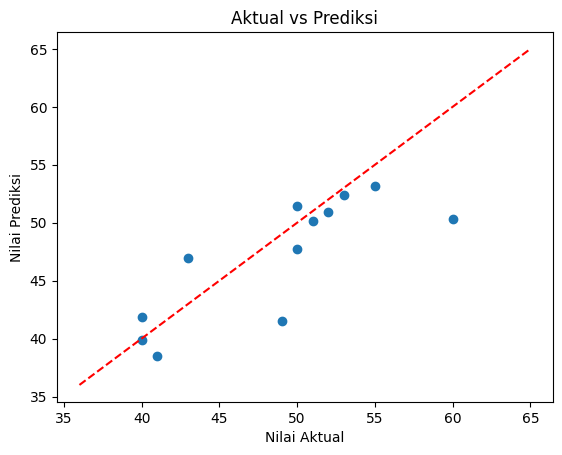

In [7]:
from sklearn import metrics
import numpy as np
from math import sqrt

y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Aktual vs Prediksi")
plt.show()


In [8]:
import joblib
joblib.dump(model, "linear_model.joblib")


['linear_model.joblib']